<a href="https://colab.research.google.com/github/KlebersonMariaCC/pc_2022.2/blob/main/ProjetoPC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Percepção Computacional e IA - 2022.2

Equipe Percepção:
* Debora Barros - debora.barros@ccc.ufcg.edu.br
* Joab Cesar - joab.pinheiro@ccc.ufcg.edu.br
* Jonatha Kennedy - jonatha.kennedy.costa@ccc.ufcg.edu.br
* Kleberson - kleberson.maria@ccc.ufcg.edu.br
* Livia Almeida - livia.almeida@ccc.ufcg.edu.br

Equipe IA:
* Amilton - amilton.cabral@ccc.ufcg.edu.br
* André - andre.martins@ccc.ufcg.edu.br
* Athila - athila.borges@ccc.ufcg.edu.br
* Joab Cesar - joab.pinheiro@ccc.ufcg.edu.br
* Jonatha Kennedy - jonatha.kennedy.costa@ccc.ufcg.edu.br

**Implementação de uma Rede Neural para classificar gênero musical de áudio**

Será utilizado o seguinte Dataset:
GTZAN Dataset - Music Genre Classification

Disponível em:
https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification










In [ ]:
import pandas as pd
import seaborn as sns
import librosa
import IPython
import matplotlib.pyplot as plt
import sklearn
import numpy as np;
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Carregamento do dataset


In [ ]:
import gdown

In [ ]:
url = "https://drive.google.com/drive/folders/1o-yKlMQ3rOhMrSC5ay59DiCWhcc97nAX"

gdown.download_folder(url, quiet=True, use_cookies=True)

['/content/dataset/classical.00003.wav',
 '/content/dataset/features_3_sec.csv',
 '/content/dataset/jazz.00015.wav']

# Visualização e análise de gráficos


### Carregando áudio de gênero clássico

In [ ]:
audio = "dataset/classical.00003.wav"
data_audio, sr = librosa.load(audio)

print (data_audio)
print (sr)

#Play áudio
IPython.display.Audio(data_audio, rate=sr)

[-0.0083313  -0.02258301 -0.04367065 ...  0.00463867 -0.00314331
 -0.00640869]
22050


### Carregando áudio de gênero jazz

In [ ]:
audio2 = "dataset/jazz.00015.wav"
data_audio2, sr2 = librosa.load(audio2)

print (data_audio2)
print (sr2)

#Play áudio
IPython.display.Audio(data_audio2, rate=sr2)

[0.02145386 0.04266357 0.04168701 ... 0.00390625 0.0065918  0.01400757]
22050


### Plotando gráfico de ondas 2D dos dois áudios

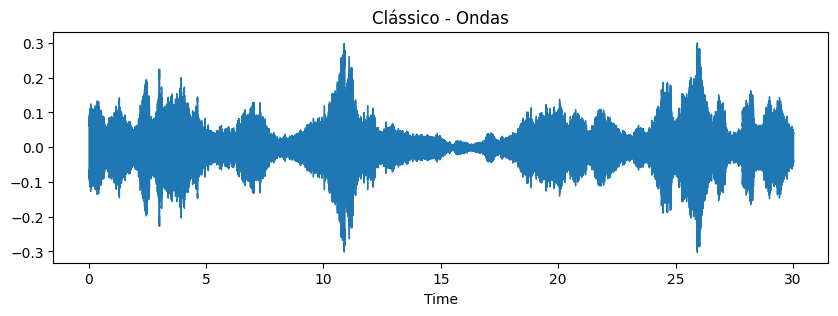

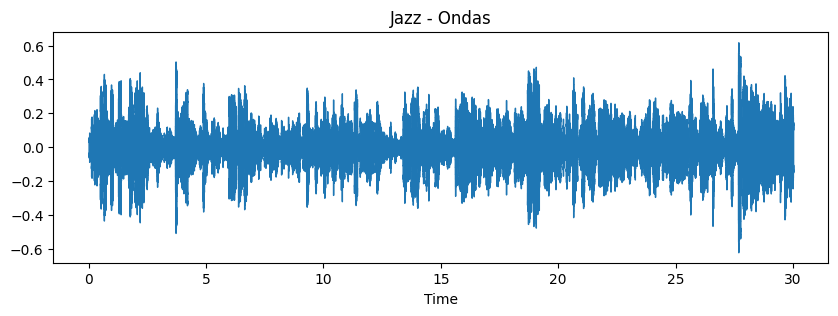

In [ ]:
plt.figure(figsize= (10, 3))
librosa.display.waveshow(y = data_audio, sr= sr)
plt.title("Clássico - Ondas");

plt.figure(figsize= (10, 3))
librosa.display.waveshow(y = data_audio2, sr= sr2)
plt.title("Jazz - Ondas");


A amplitude da onda sonora define a sua intensidade, ou a quantidade de energia que essa onda carrega consigo, que também pode ser entendida como o “volume do
som” .É perceptível que no jazz ocorre oscilação maior, ou mais agressiva, enquanto no clássico são mais sutis, com uma visão mais clara do caminhar da onda.

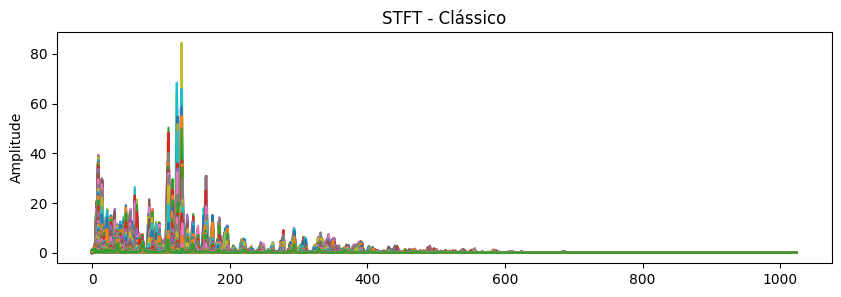

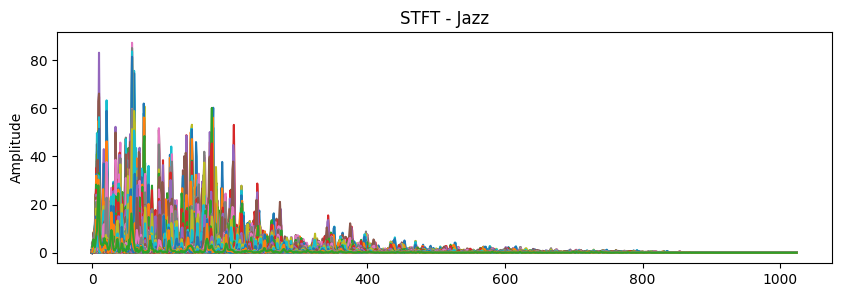

In [ ]:
# Transformada de Fourier de Curta Duração
# Recebe sinal no domínio do tempo e gera decomposição em frequências
stft = librosa.stft(data_audio)
D = np.abs(stft)

plt.figure(figsize = (10, 3))
plt.plot(D)
plt.ylabel("Amplitude")
plt.title("STFT - Clássico");

stft2 = librosa.stft(data_audio2)
D2 = np.abs(stft2)

plt.figure(figsize = (10, 3))
plt.plot(D2)
plt.ylabel("Amplitude")
plt.title("STFT - Jazz");

### Espectograma

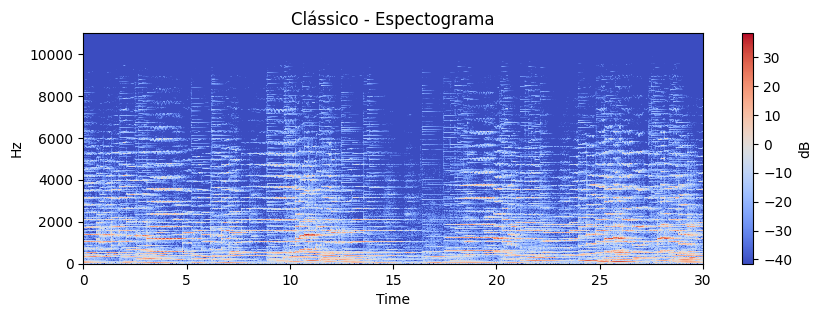

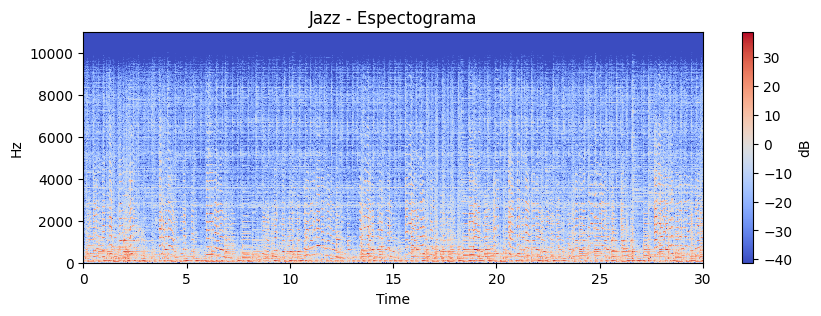

In [ ]:
stft_db = librosa.amplitude_to_db(D)

plt.figure(figsize = (10, 3))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar().set_label('dB')
plt.title("Clássico - Espectograma");


stft_db2 = librosa.amplitude_to_db(D2)

plt.figure(figsize = (10, 3))
librosa.display.specshow(stft_db2, sr=sr2, x_axis='time', y_axis='hz')
plt.colorbar().set_label('dB')
plt.title("Jazz - Espectograma");

# Características de Áudio

In [ ]:
# Zero Crossing Rate - Taxa de cruzamento por zero
# Indica a frequência que um sinal de áudio cruza o eixo ao longo do tempo

zero_crossing = librosa.zero_crossings(data_audio, pad=False)
print("Clássico - " + str(sum(zero_crossing)))

zero_crossing2 = librosa.zero_crossings(data_audio2, pad=False)
print("Jazz - " + str(sum(zero_crossing2)))

Clássico - 72206
Jazz - 48742


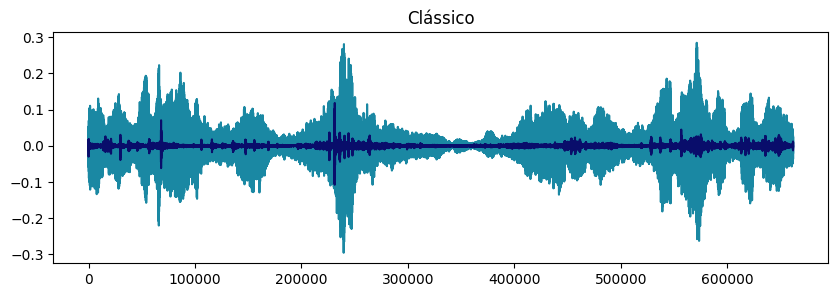

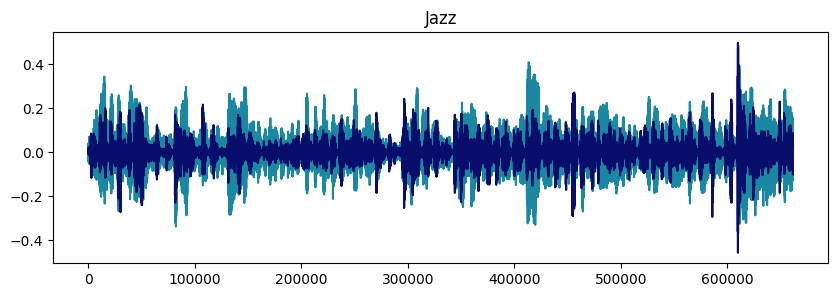

In [ ]:
# Elementos Harmônicos e Percussivos
# Pode servir para analisar a estrutura rítmica e melódica

y_harm, y_perc = librosa.effects.hpss(data_audio)

plt.figure(figsize = (10, 3))
plt.title("Clássico")
plt.plot(y_harm, color = '#1a88a3'); # azul claro
plt.plot(y_perc, color = '#090d6b'); # azul escuro

y_harm2, y_perc2 = librosa.effects.hpss(data_audio2)

plt.figure(figsize = (10, 3))
plt.title("Jazz")
plt.plot(y_harm2, color = '#1a88a3'); # azul claro
plt.plot(y_perc2, color = '#090d6b'); # azul escuro

In [ ]:
#BPM
#Tempo global estimado (em batidas por minuto)

tempo = librosa.beat.beat_track(y = data_audio, sr = sr)
print("Clássico = " + str(tempo[0]))

tempo2 = librosa.beat.beat_track(y = data_audio2, sr = sr2)
print("Jazz = " + str(tempo2[0]))

Clássico = 71.77734375
Jazz = 117.45383522727273


Clássico - Centroids:  [1476.06395774 1443.05990281 1361.147458   ... 1581.28237853 1521.86792345
 1698.37428538]
Jazz - Centroids:  [1897.22406505 1902.3273261  2108.75802379 ... 1886.03433427 1651.12933125
 1479.23279667]


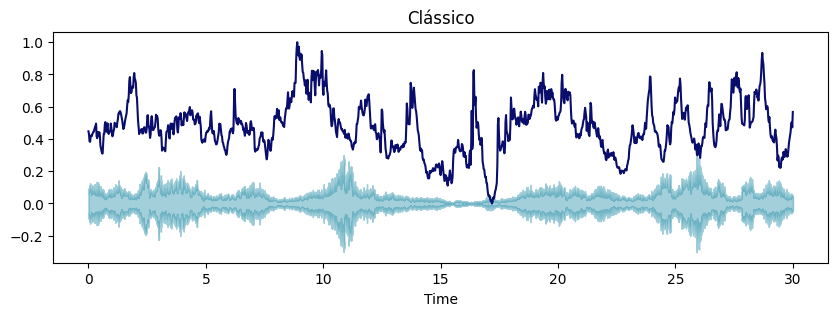

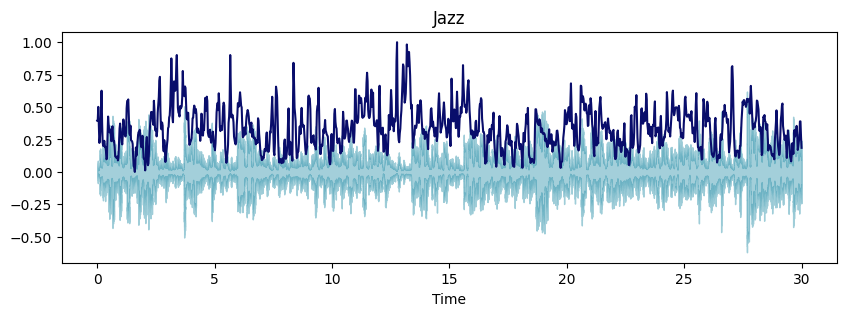

In [ ]:
# Spectral Centroid - Centróide Espectral
# Média ponderada das frequências presentes em um espectro de frequência
# Brilho ou cor do som, podendo servir para analisar timbre e separar fontes

spectral_centroids = librosa.feature.spectral_centroid(y = data_audio, sr = sr)[0]
print ("Clássico - Centroids: ", spectral_centroids)

frames = range(len(spectral_centroids))

# Mapeia quadros para valores de tempo
t = librosa.frames_to_time(frames)

def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)

plt.figure(figsize = (10, 3))
librosa.display.waveshow(data_audio, sr = sr, color = '#1a88a3', alpha = 0.4)
plt.plot(t, normalize(spectral_centroids), color = '#090d6b')
plt.title("Clássico");

spectral_centroids2 = librosa.feature.spectral_centroid(y = data_audio2, sr = sr2)[0]
print ("Jazz - Centroids: ", spectral_centroids2)

frames2 = range(len(spectral_centroids2))

t2 = librosa.frames_to_time(frames2)

plt.figure(figsize = (10, 3))
librosa.display.waveshow(data_audio2, sr = sr2, color = '#1a88a3', alpha = 0.4)
plt.plot(t2, normalize(spectral_centroids2), color = '#090d6b')
plt.title("Jazz");

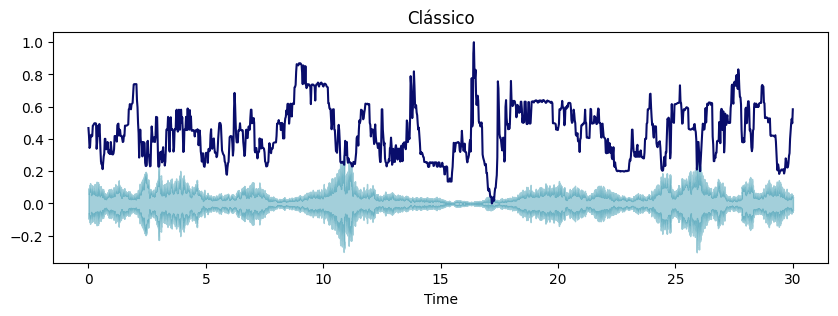

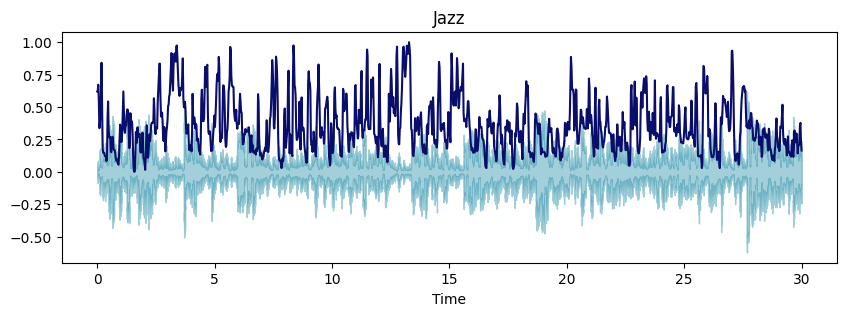

In [ ]:
# Spectral Rolloff - Rolloff Espectral
# Indica a frequência abaixo da qual uma determinada porcentagem (default é 85%) da energia total
# do espectro de frequência está concentrada.
# Análise de brilho, separação de fontes e caracterização de gênero

spectral_rolloff = librosa.feature.spectral_rolloff(y = data_audio, sr = sr)[0]

plt.figure(figsize = (10, 3))
librosa.display.waveshow(data_audio, sr = sr, color = '#1a88a3', alpha = 0.4)
plt.plot(t, normalize(spectral_rolloff), color = '#090d6b')
plt.title("Clássico");

spectral_rolloff2 = librosa.feature.spectral_rolloff(y = data_audio2, sr = sr2)[0]

plt.figure(figsize = (10, 3))
librosa.display.waveshow(data_audio2, sr = sr2, color = '#1a88a3', alpha = 0.4)
plt.plot(t2, normalize(spectral_rolloff2), color = '#090d6b')
plt.title("Jazz");

Classico mfccs shape: (20, 1293)
Jazz mfccs shape: (20, 1293)


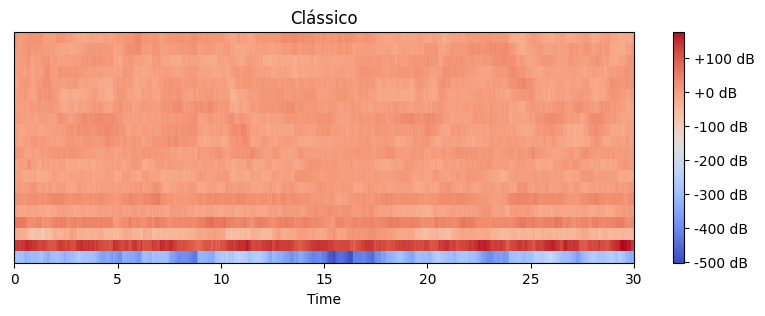

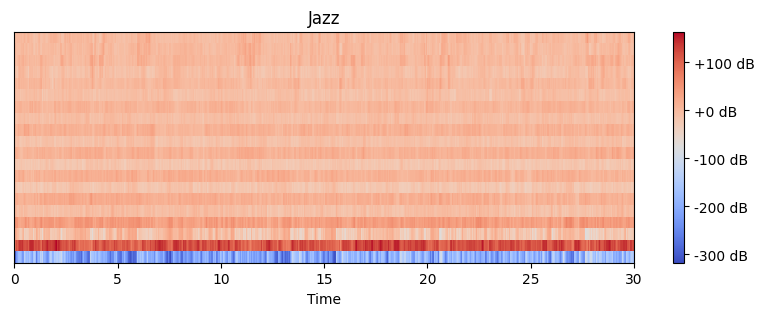

In [ ]:
# MFCC - Mel Frequency Cepstral Coefficients - Coeficientes Cepstrais de Frequência Mel
# Comumente usados para capturar as características espectrais de um sinal de áudio
# Geralmente entre 10 a 20 são extraídos
# Fornecem informações sobre a distribuição espectral e a forma do espectro de um
# sinal de áudio, sendo úteis para representar as características acústicas e discriminativas do sinal

mfccs = librosa.feature.mfcc(y=data_audio, sr=sr)

print('Classico mfccs shape:', mfccs.shape)
plt.figure(figsize = (10, 3))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("Clássico");

mfccs2 = librosa.feature.mfcc(y=data_audio2, sr=sr2)

print('Jazz mfccs shape:', mfccs2.shape)
plt.figure(figsize = (10, 3))
librosa.display.specshow(mfccs2, sr=sr2, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title("Jazz");

Clássico:
Mean: 2.9502685e-09
Var: 1.0000001
Jazz:
Mean: 1.032594e-09
Var: 1.0


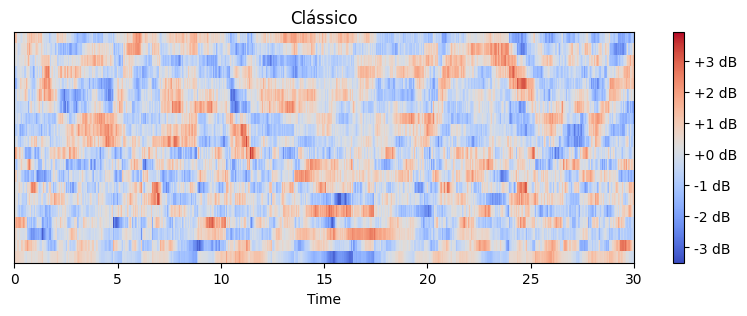

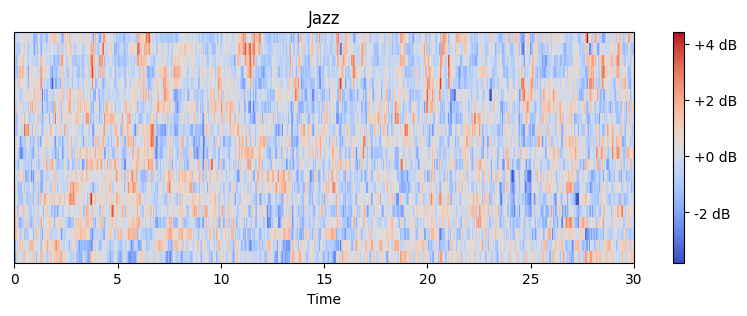

In [ ]:
# Perform Feature Scaling
# Padronização dos dados, normalizando-os, importante para muitas técnicas de
# aprendizagem de máquina, onde algoritmos possam ser sensíveis a diferenças de escala nos dados.

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

print("Clássico:")
print('Mean:', mfccs.mean())
print('Var:', mfccs.var())
plt.figure(figsize = (10,3))
img = librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(img, format='%+2.0f dB')
plt.title("Clássico");

mfccs2 = sklearn.preprocessing.scale(mfccs2, axis=1)

print("Jazz:")
print('Mean:', mfccs2.mean())
print('Var:', mfccs2.var())
plt.figure(figsize = (10,3))
img2 = librosa.display.specshow(mfccs2, sr=sr2, x_axis='time')
plt.colorbar(img2, format='%+2.0f dB')
plt.title("Jazz");

Chromogram shape: (12, 133)
Chromogram shape: (12, 133)


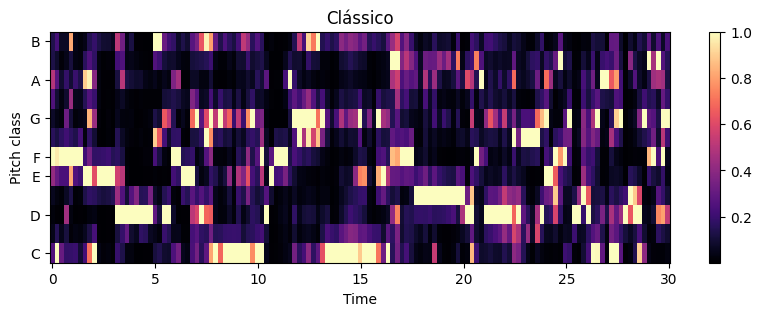

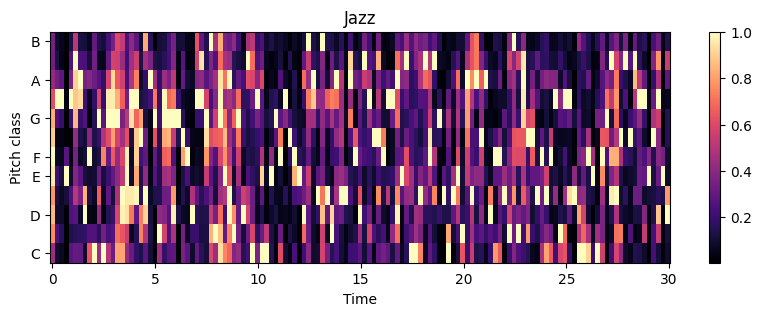

In [ ]:
# Frequências de Croma - Cromagrama
# Representação do conteúdo tonal ao longo do tempo
# Distribuição de energia das diferentes classes tonais, como as notas musicais
# Identificação de notas e acordes, análise de tonalidade, reconhecimento de melodia
# Representação visual e quantitativa

#número de amostras entre os pontos iniciais de janelas consecutivas
hop_length = 5000

chromagram = librosa.feature.chroma_stft(y=data_audio, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(10,3))
img = librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length)
plt.colorbar(img)
plt.title("Clássico");

chromagram2 = librosa.feature.chroma_stft(y=data_audio2, sr=sr2, hop_length=hop_length)
print('Chromogram shape:', chromagram2.shape)

plt.figure(figsize=(10,3))
img2 = librosa.display.specshow(chromagram2, x_axis='time', y_axis='chroma', hop_length=hop_length)
plt.colorbar(img2)
plt.title("Jazz");


# Preparação dos dados

In [ ]:
df = pd.read_csv("dataset/features_3_sec.csv")

In [ ]:
# Mapeando os estilos músicais em números
estilos_mus = {}
for label in df['label']:
  estilos_mus[label] = 0

for i, estilo in enumerate(estilos_mus):
  df['label'] = df['label'].replace(estilo, i)
  estilos_mus[estilo] = i

print(estilos_mus)

# Embaralhando o dataframe
df = df.sample(frac=1).reset_index(drop=True)

# Removendo coluna com o nome dos arquivos
df = df.drop(labels='filename',axis=1)

# Separando dados de treinamento e teste
df_train = df.sample(frac=0.8)  # separate 80% data to train
df_eval = df.drop(df_train.index)

y_train = df_train.pop('label') # the ramaining 20% data to test
y_eval = df_eval.pop('label')

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


In [ ]:
convertor = LabelEncoder()
fit = StandardScaler()

In [ ]:
# Transformando e padronizando os dados

X_train = fit.fit_transform(np.array(df_train.iloc[:, :-1], dtype = float))
Y_train = convertor.fit_transform(y_train)

X_test = fit.fit_transform(np.array(df_eval.iloc[:, :-1], dtype = float))
Y_test = convertor.fit_transform(y_eval)

In [ ]:
len(X_train)

7992

In [ ]:
X_train

array([[ 0.        ,  0.14229234, -0.33701698, ...,  2.38899492,
        -0.27266689, -0.10861006],
       [ 0.        , -0.60322817,  0.19202897, ...,  0.02736318,
         0.17198553, -0.61971635],
       [ 0.        ,  0.33785426, -0.09558511, ...,  0.16319821,
        -0.76337122,  0.46589449],
       ...,
       [ 0.        , -1.6511314 ,  0.82063311, ...,  0.18726946,
        -0.74564204, -0.53251069],
       [ 0.        ,  1.76237443, -0.8775124 , ...,  1.39871474,
         0.21132382,  0.48598026],
       [ 0.        ,  1.04182229,  0.81739378, ...,  0.28905541,
         1.31322508,  1.73507411]])

In [ ]:
Y_train

array([2, 5, 3, ..., 5, 8, 4])

In [ ]:
len(X_test)

1998

In [ ]:
X_test

array([[ 0.        ,  1.32290012, -1.83371716, ...,  0.21273777,
        -0.17901826, -0.30496519],
       [ 0.        ,  1.05771665, -0.52731081, ..., -0.85109046,
         0.25705773, -0.44120824],
       [ 0.        , -1.07620348,  0.99240666, ...,  0.31297581,
        -0.40952015, -0.05207391],
       ...,
       [ 0.        ,  1.27718662, -1.25334676, ...,  1.32796093,
        -0.83390164, -0.19576118],
       [ 0.        ,  0.65356085,  1.10180853, ..., -0.37629151,
         0.4368427 , -1.36296549],
       [ 0.        ,  1.16321798, -0.98963463, ..., -0.42549127,
        -0.65819026,  0.58787639]])

In [ ]:
Y_test

array([3, 8, 2, ..., 6, 4, 6])

# Treinamento da Rede Neural

In [ ]:
# Critério de parada do treinamento: parar quando a perda da validação não apresentar melhora após 10 épocas
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# Dividindo os dados de teste para teste e validação
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.20)

In [ ]:
len(x_train)

6393

In [ ]:
len(x_val)

1599

In [ ]:
# Definição dos parâmetros de treinamento do modelo

def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(x_train, y_train,
                     validation_data=(x_val, y_val),
                     epochs=epochs,
                     batch_size=batch_size,
                     callbacks=[callback])

In [ ]:
# Definição da rede neural
# Foram utilizadas apenas camadas densa e de dropout

model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(x_train.shape[1],)),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation="softmax"),

])

print(model.summary())
model_history = trainModel(model=model, epochs=1500, optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               29696     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

# Avaliação da rede neural

Validation Accuracy 0.9018136262893677


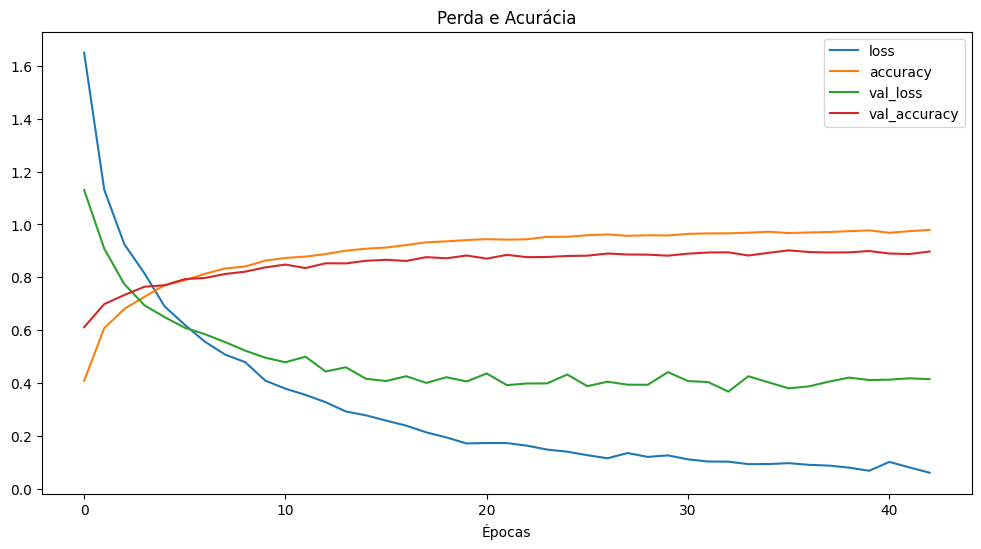

In [ ]:
#Curvas de perda e acurácia do treinamento (treino e validação)
def plotValidate(history, title):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6),title = title, xlabel = 'Épocas')
    plt.show()

plotValidate(model_history, "Perda e Acurácia")

## Predição com os dados de teste

In [ ]:
prediction = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test, batch_size=128)

16/16 [==============================] - 0s 3ms/step - loss: 0.4389 - accuracy: 0.9069


In [ ]:
#Perda e acurácia dos dados de teste (test_loss, test_accuracy)

print("Perda no teste:", test_loss)
print("Acurácia no teste:", test_accuracy)

Perda no teste: 0.43887048959732056
Acurácia no teste: 0.9069069027900696


In [ ]:
#Classe com maior probabilidade para cada predição

predict_classes = prediction.argmax(axis= -1)
predict_classes

array([3, 8, 2, ..., 6, 4, 6])

In [ ]:
Y_test

array([3, 8, 2, ..., 6, 4, 6])

<Axes: >

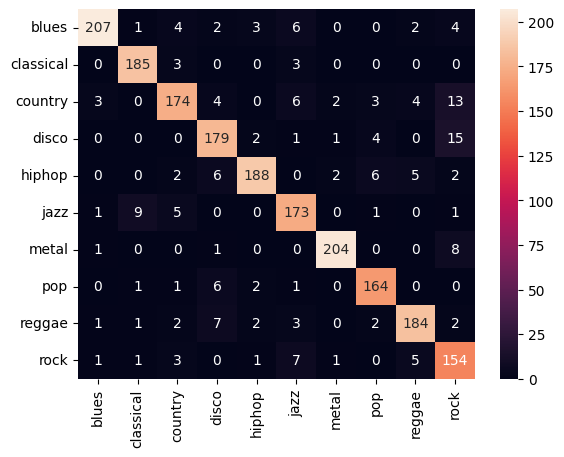

In [ ]:
#Matriz de confusão (Y_test, prediction)

conf_matrix = confusion_matrix(Y_test,predict_classes)

sns.heatmap(conf_matrix, annot = True, fmt = 'd', xticklabels= estilos_mus,yticklabels = estilos_mus)


In [ ]:
# Métricas
report = classification_report(Y_test, predict_classes, target_names = estilos_mus)
print(report)

              precision    recall  f1-score   support

       blues       0.97      0.90      0.93       229
   classical       0.93      0.97      0.95       191
     country       0.90      0.83      0.86       209
       disco       0.87      0.89      0.88       202
      hiphop       0.95      0.89      0.92       211
        jazz       0.86      0.91      0.89       190
       metal       0.97      0.95      0.96       214
         pop       0.91      0.94      0.92       175
      reggae       0.92      0.90      0.91       204
        rock       0.77      0.89      0.83       173

    accuracy                           0.91      1998
   macro avg       0.91      0.91      0.91      1998
weighted avg       0.91      0.91      0.91      1998



# XGBoost

In [ ]:
from xgboost import XGBClassifier

xgmodel = XGBClassifier(n_estimators=1000)
xgmodel.fit(X_train,Y_train,eval_metric='merror')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
y_pred_train = xgmodel.predict(X_train)
y_pred_test = xgmodel.predict(X_test)
target_names = estilos_mus

print(f'Training accuracy: {accuracy_score(Y_train,y_pred_train)}')
print(f'Training:\n {classification_report(Y_train, y_pred_train,target_names= target_names)}')
print(f'Testing accuracy: {accuracy_score(Y_test,y_pred_test)}')
print(f'Testing:\n {classification_report(Y_test, y_pred_test,target_names= target_names)}')

Training accuracy: 0.9991241241241241
Training:
               precision    recall  f1-score   support

       blues       1.00      1.00      1.00       771
   classical       1.00      1.00      1.00       807
     country       1.00      1.00      1.00       788
       disco       1.00      1.00      1.00       797
      hiphop       1.00      1.00      1.00       787
        jazz       1.00      1.00      1.00       810
       metal       0.99      1.00      1.00       786
         pop       1.00      1.00      1.00       825
      reggae       1.00      1.00      1.00       796
        rock       1.00      1.00      1.00       825

    accuracy                           1.00      7992
   macro avg       1.00      1.00      1.00      7992
weighted avg       1.00      1.00      1.00      7992

Testing accuracy: 0.8973973973973974
Testing:
               precision    recall  f1-score   support

       blues       0.91      0.89      0.90       229
   classical       0.93      0.96   

<Axes: >

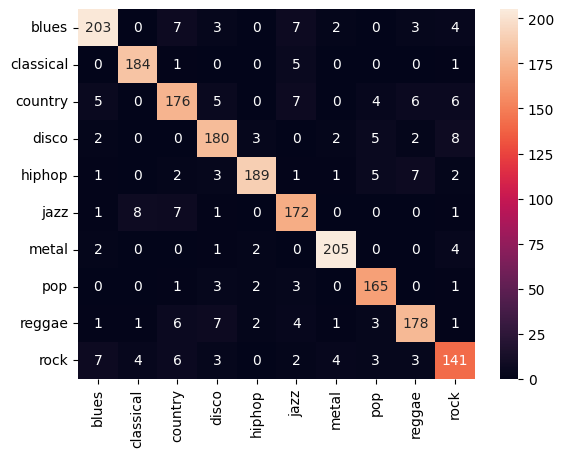

In [ ]:
#Matriz de confusão (Y_test, prediction)

conf_matrix = confusion_matrix(Y_test,y_pred_test)

sns.heatmap(conf_matrix, annot = True, fmt = 'd', xticklabels= estilos_mus,yticklabels = estilos_mus)